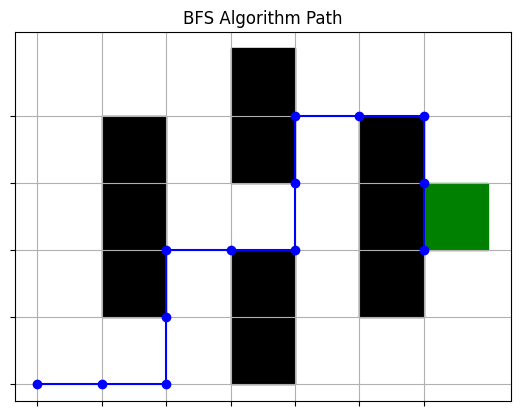

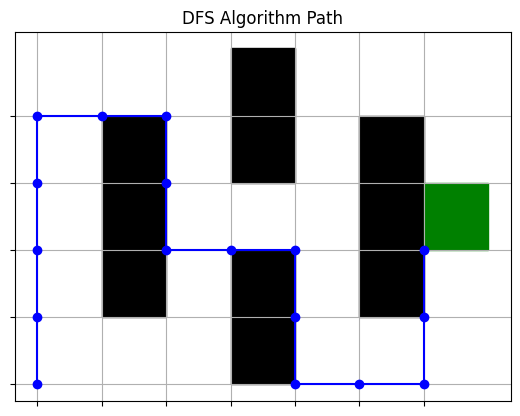

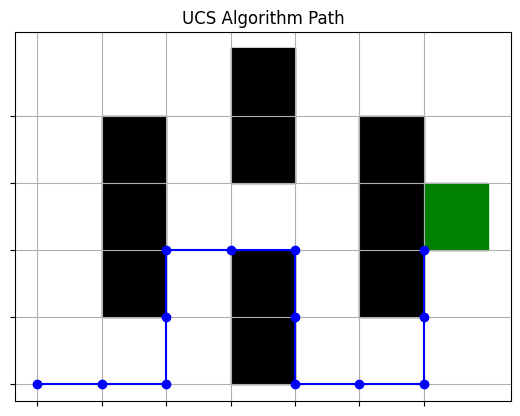

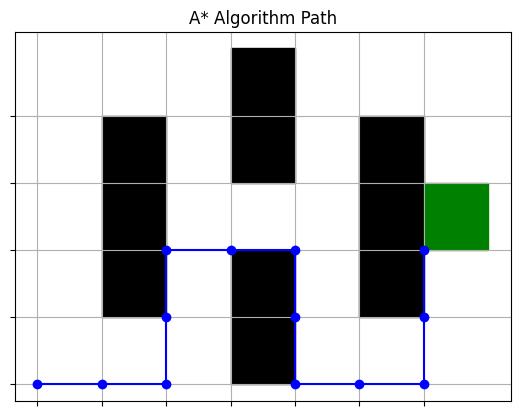

In [4]:
import heapq
import matplotlib.pyplot as plt
from collections import deque

class GridNavigation:
    def __init__(self, grid, start, goals, exit_point, costs=None):
        self.grid = grid
        self.start = start
        self.goals = goals  # List of goal positions
        self.exit = exit_point
        self.costs = costs if costs else {goal: 1 for goal in goals}  # Default cost = 1 if not specified
        self.rows = len(grid)
        self.cols = len(grid[0])

    def get_neighbors(self, position):
        """Returns valid neighboring positions (avoiding walls and staying within bounds)."""
        x, y = position
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        neighbors = []
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.rows and 0 <= ny < self.cols and self.grid[nx][ny] != '#':
                neighbors.append((nx, ny))
        return neighbors

    def bfs(self):
        """Breadth-First Search (for unweighted goals)."""
        queue = deque([(self.start, [])])  # (position, path)
        visited = set()

        while queue:
            position, path = queue.popleft()
            if position in visited:
                continue
            visited.add(position)

            new_path = path + [position]

            if position in self.goals:
                self.goals.remove(position)

            if not self.goals and position == self.exit:
                return new_path  # Return path once all goals are collected and exit is reached

            for neighbor in self.get_neighbors(position):
                queue.append((neighbor, new_path))

        return None  # No valid path found

    def dfs(self):
        """Depth-First Search (for unweighted goals)."""
        stack = [(self.start, [])]
        visited = set()

        while stack:
            position, path = stack.pop()
            if position in visited:
                continue
            visited.add(position)

            new_path = path + [position]

            if position in self.goals:
                self.goals.remove(position)

            if not self.goals and position == self.exit:
                return new_path  # Return path once all goals are collected and exit is reached

            for neighbor in self.get_neighbors(position):
                stack.append((neighbor, new_path))

        return None  # No valid path found

    def ucs(self):
        """Uniform Cost Search (for weighted goals)."""
        pq = [(0, self.start, [])]  # (cost, position, path)
        visited = {}

        while pq:
            cost, position, path = heapq.heappop(pq)
            if position in visited and visited[position] <= cost:
                continue
            visited[position] = cost

            new_path = path + [position]

            if position in self.goals:
                self.goals.remove(position)

            if not self.goals and position == self.exit:
                return new_path, cost  # Return path and total cost

            for neighbor in self.get_neighbors(position):
                heapq.heappush(pq, (cost + self.costs.get(neighbor, 1), neighbor, new_path))

        return None  # No valid path found

    def a_star(self):
        """A* Search (for weighted goals)."""
        def heuristic(position):
            """Heuristic function (Manhattan Distance to exit)."""
            return abs(position[0] - self.exit[0]) + abs(position[1] - self.exit[1])

        pq = [(0 + heuristic(self.start), 0, self.start, [])]  # (f-score, cost, position, path)
        visited = {}

        while pq:
            f_score, cost, position, path = heapq.heappop(pq)
            if position in visited and visited[position] <= cost:
                continue
            visited[position] = cost

            new_path = path + [position]

            if position in self.goals:
                self.goals.remove(position)

            if not self.goals and position == self.exit:
                return new_path, cost  # Return path and total cost

            for neighbor in self.get_neighbors(position):
                g = cost + self.costs.get(neighbor, 1)
                heapq.heappush(pq, (g + heuristic(neighbor), g, neighbor, new_path))

        return None  # No valid path found

    def plot_path(self, path, title):
        """Plot the grid and the path taken by the algorithm."""
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.set_xticks(range(len(self.grid[0])))
        ax.set_yticks(range(len(self.grid)))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)

        # Draw grid elements
        for r in range(len(self.grid)):
            for c in range(len(self.grid[0])):
                if self.grid[r][c] == '#':
                    ax.add_patch(plt.Rectangle((c, r), 1, 1, color='black'))  # Walls
                elif (r, c) in self.goals:
                    ax.add_patch(plt.Rectangle((c, r), 1, 1, color='gold'))  # Goals
                elif (r, c) == self.exit:
                    ax.add_patch(plt.Rectangle((c, r), 1, 1, color='green'))  # Exit

        # Plot the path
        if path:
            x_vals, y_vals = zip(*path)
            ax.plot(y_vals, x_vals, marker='o', color='blue', linestyle='-')

        plt.show()


# Example Usage:
grid = [
    ['.', '.', '.', '#', '.', '.', '.'],
    ['.', '#', '.', '#', '.', '#', '.'],
    ['.', '#', 'G', '.', '.', '#', 'E'],  # 'G' = Goal, 'E' = Exit
    ['.', '#', '.', '#', 'G', '#', '.'],
    ['.', '.', '.', '#', '.', '.', '.'],
]

start = (0, 0)
goals = {(2, 2), (3, 4)}  # Multiple goal positions
exit_point = (2, 6)
costs = {(2, 2): 2, (3, 4): 3}  # Different goal costs

navigator = GridNavigation(grid, start, goals.copy(), exit_point, costs)

# Run each algorithm and plot the results
bfs_path = navigator.bfs()
navigator.plot_path(bfs_path, "BFS Algorithm Path")

dfs_path = navigator.dfs()
navigator.plot_path(dfs_path, "DFS Algorithm Path")

ucs_path, _ = navigator.ucs()
navigator.plot_path(ucs_path, "UCS Algorithm Path")

a_star_path, _ = navigator.a_star()
navigator.plot_path(a_star_path, "A* Algorithm Path")
